In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Analytical solution to given integral

$$ I = \int_0^1 e^{5x} dx  \\
= \left(\frac{1}{5}e^{5x}\right)^1_0 \\
= \frac{e^5 - 1}{5} \\
= 29.4826 $$

In [2]:
## Finding exact numerical value 
I_exact = (np.exp(5)-1)/5

I_exact

29.48263182051532

## Question 1: Integration - Comparison

In [3]:
#### Defining function for trapezoid integration ############

def trapezoidint(f, a,b, N):
    h = (b-a)/N                 # dividing into smaller rectangles
    I = 0                       # initial value of integral = 0
    for i in range(1,N):        # for every single rectangle
        I = I + f(a + i*h)      # evaluate the area and add
    I = I + f(a)*0.5 + f(b)*0.5 # add final values with correct weightage
    I = I*h                     # multiply back with width of rectangle
    return I

#### Defining function for simpson 1/3 integration ############

def simpson13int(f, a,b,N):
    h = (b-a)/N                    # dividing into smaller rectangles
    I = f(a)+f(b)                  # initial value of integral = sum of function values at boundaries
    for i in range(1,N):           # for all rectangles
        c = a+i*h     
        if i%2==0:      # if i is even
            I = I + 2*f(c)
        else:           # if i is odd
            I = I + 4*f(c)
    integ = (h/3)*I                 # returning with correct weightage
    return integ

In [4]:
# Defining function to be integrated
def f1(x):
    return np.exp(5*x)

#### Finding value of integral using trapezoid integration for different N values -

In [5]:
I1 = trapezoidint(f1, 0,1,1)
I5 = trapezoidint(f1, 0,1,5)
I10 = trapezoidint(f1, 0,1,10)
I50 = trapezoidint(f1, 0,1,50)
I100 = trapezoidint(f1, 0,1,100)
I500 = trapezoidint(f1, 0,1,500)
I1000 = trapezoidint(f1, 0,1,1000)
I10000 = trapezoidint(f1, 0,1,10000)

print("Values of integral using trapezoidal rule for N = 1,5,10,50,100,500,1000,10000 respectively are:")
I1, I5, I10, I50, I100, I500, I1000, I10000

Values of integral using trapezoidal rule for N = 1,5,10,50,100,500,1000,10000 respectively are:


(74.7065795512883,
 31.899520887001984,
 30.09430919959657,
 29.507196586530494,
 29.48877377956754,
 29.482877508704345,
 29.48269324263935,
 29.48263243473681)

#### Finding value of integral using simpson 1/3rd integration for different N values -

In [6]:
I1 = simpson13int(f1, 0, 1, 1)
I5 = simpson13int(f1, 0, 1, 5)
I10 = simpson13int(f1, 0, 1, 10)
I50 = simpson13int(f1, 0, 1, 50)
I100 = simpson13int(f1, 0, 1, 100)
I500 = simpson13int(f1, 0, 1, 500)
I1000 = simpson13int(f1, 0, 1, 1000)
I10000 = simpson13int(f1, 0, 1, 10000)

print("Values of integral using simpson's 1/3rd rule for N = 1,5,10,50,100,500,1000,10000 respectively are:")
I1, I5, I10, I50, I100, I500, I1000, I10000

Values of integral using simpson's 1/3rd rule for N = 1,5,10,50,100,500,1000,10000 respectively are:


(49.80438636752553,
 24.30685642488755,
 29.492571970461434,
 29.48264818027658,
 29.482632843913223,
 29.482631822153227,
 29.482631820617705,
 29.48263182051537)

#### Plotting absolute error as a function of number of intervals for both methods

###### Trapezoid method

In [7]:
N = np.array([2**i for i in range(15)])             # Taking all powers of 2 till 2^15 as N values
abs_err_trape = np.zeros(len(N))

for i in range(1,len(N)+1):                          # calculating absolute error values for every N value
    abs_err_trape[i-1] = np.abs(trapezoidint(f1, 0,1,N[i-1]) - I_exact)


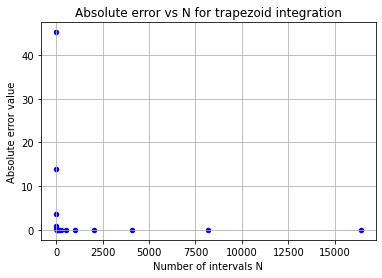

In [8]:
# Plotting
plt.scatter(N, abs_err_trape, s = 20, color='b')
plt.xlabel("Number of intervals N")
plt.ylabel("Absolute error value")
plt.title("Absolute error vs N for trapezoid integration")
plt.grid()
plt.show()

#### Plotting log-log plot to find out power law dependence from slope of best-fit line

Power law dependence of absolute error on N is: p = -1.9851985571163613


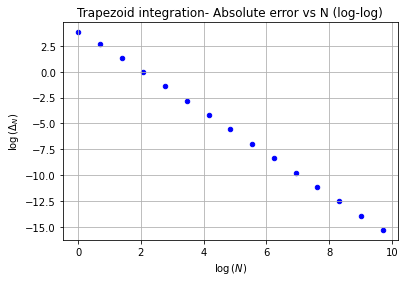

In [9]:
plt.scatter(np.log(N), np.log(abs_err_trape), s = 20, color='b')
plt.xlabel(r"$\log{(N)}$")
plt.ylabel(r"$\log{(\Delta_N)}$")
plt.title("Trapezoid integration- Absolute error vs N (log-log)")

m1,c1 = np.polyfit(np.log(N), np.log(abs_err_trape), 1)
print(r"Power law dependence of absolute error on N is: p =", m1)
plt.grid()
plt.show()

### Thus, for trapezoid method, $p \sim -2$ 

#### Simpson 1/3rd method

In [10]:
N = np.array([2**i for i in range(14)])              # Taking all powers of 2 till 2^15 as N values
abs_err_simp = np.zeros(len(N))

for i in range(1,len(N)+1):                           # calculating absolute error values for every N value
    abs_err_simp[i-1] = np.abs(simpson13int(f1, 0,1,N[i-1]) - I_exact)


#### Plotting log-log plot to find out power law dependence from slope of best-fit line

Power law dependence of absolute error on N is: -3.9169052578409818


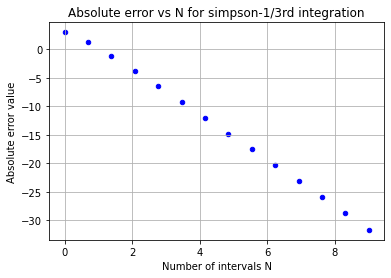

In [11]:
plt.scatter(np.log(N), np.log(abs_err_simp), s = 20, color='b')
plt.xlabel("Number of intervals N")
plt.ylabel("Absolute error value")
plt.title("Absolute error vs N for simpson-1/3rd integration")
m2,c2 = np.polyfit(np.log(N), np.log(abs_err_simp), 1)
print(r"Power law dependence of absolute error on N is:", m2)
plt.grid()
plt.show()

### Thus, for simpson 1/3rd method, $p \sim -4$ 

# Question 2 - Adaptive Integration

In [12]:
def f1(x):               # defining function to be integrated
    return np.exp(5*x)


####### Writing adaptive integration function recursively

def adaptiveint2(f,a,b, fa, fb, eps, counter = 0): 
    
    '''Implemented modification of include fa=f(a) and fb=f(b) in the parameters itself to reduce number of function
    evalutions. The routine now needs to evaluate only 1 function value per recursive loop, that at the midpoint.'''
    
    
    # Integral calculation
    midp = (a+b)/2
    fp = f(midp)
    I0 = 0.5*(b-a)*(fa+fb)
    I1 = 0.25*(b-a)*(fa+fp)
    I2 = 0.25*(b-a)*(fb+fp)
    
    if np.abs(I0-I1-I2)<eps:    # if required precision achieved, return integral value and counter
        
        return [(I1 + I2), counter]
    
    else:                      # else, recursive call back to function with appropriately modified parameters
        
        # Now, to reduce function calls and correct the counter, we split the left and right integral calls
        # Part 1 (Counter increases by 1 every recursive step from the previous value)
        int1, ctr1 = adaptiveint2(f,a,midp, fa, fp, counter=counter+1, eps=eps)   
        # Part 2 (To get correct counter values, in this part we increment the counter from the last ctr value )
        int2, ctr2 = adaptiveint2(f,midp,b, fp, fb, counter=ctr1+1, eps=eps)
        
        # return for recursive calls
        return int1 + int2, ctr2
    

#### Value of integral using adaptive method

In [13]:
%%time
# Test run to see if recursive function works

counter = 0
integral, count = adaptiveint2(f=f1, a=0, b=1, fa=f1(0), fb=f1(1), eps=1e-10)
print("Value of integral using adaptive method is:", integral)
print("Number of recursive steps needed at given epsilon value is:", count)
#print(final)


Value of integral using adaptive method is: 29.482631933336968
Number of recursive steps needed at given epsilon value is: 18672
Wall time: 48.8 ms


#### Plotting the variation of tolerance $\epsilon$ with number of recursions done

In [14]:
eps = np.array([1e-1,1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15])

In [15]:
%%time

counter = 0
recur_counts = np.zeros(len(eps))

for i in range(len(eps)): 
    recur_counts[i] = adaptiveint2(f=f1, a=0, b=1, fa=f1(0), fb=f1(1), eps=eps[i])[1]

Wall time: 3.71 s


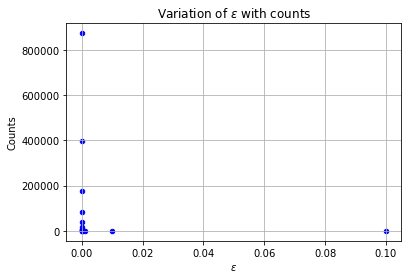

In [16]:
plt.scatter(eps, recur_counts, color='b', s=20)
plt.title(r"Variation of $\epsilon$ with counts")
plt.grid()
plt.xlabel(r"$\epsilon$")
plt.ylabel(r"Counts")
plt.show()

#### Plotting log-log plots to extract power of power law (if it is one)

The slope of the best fit line, giving us the power law as p = -0.33547293122066046


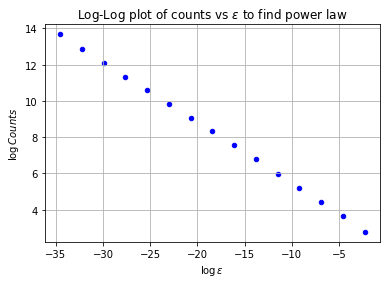

In [17]:
plt.scatter(np.log(eps), np.log(recur_counts), color='b', s=20)
plt.grid()
m3,c3 = np.polyfit(np.log(eps), np.log(recur_counts),1)
plt.title(r"Log-Log plot of counts vs $\epsilon$ to find power law")
plt.xlabel(r"$\log{\epsilon}$")
plt.ylabel(r"$\log{Counts}$")
print("The slope of the best fit line, giving us the power law as p =", m3)
plt.show()